In [1]:
import re
import sys
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '/data_extraction/')
from DataBaseInterface import LoadDatabaseAsDF

conn = sqlite3.connect('ALL_DATA_8_FEATURES.db')
tweets_df = pd.read_sql("SELECT * FROM tweets", conn)
convo_df = pd.read_sql("SELECT conversation_id, tweet_ids, airlines_involved FROM conversations", conn)

In [2]:
tweets_df.head(5)

,id_str,text,lang,created_at,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,"('user', 'id_str')"
0,780682646854787072,@johnnymowlem @VirginAtlantic @IMSA @BAR1Motor...,en,Tue Sep 27 08:17:02 +0000 2016,7.806784e+17,107695463.0,johnnymowlem,224166213
1,780682647429414912,RT @JulieThoin: L'audience reprend. Examen du ...,fr,Tue Sep 27 08:17:02 +0000 2016,NaN,NaN,None,41935535
2,780682655104991232,Flew into Gatwick last night. 5 hour drive nor...,en,Tue Sep 27 08:17:04 +0000 2016,7.806784e+17,165883353.0,gforsterphoto,220691420
3,780682685761093632,"👎🏼 what is with Italy...#nopassport control, I...",en,Tue Sep 27 08:17:11 +0000 2016,NaN,NaN,None,27716236
4,780682727993507840,Qqun a déjà voyagé avec RyanAir ici ?,fr,Tue Sep 27 08:17:21 +0000 2016,NaN,NaN,None,3315690130


In [3]:
user_df = {}

for tweet in tweets_df.values:
    if "@KLM" in tweet[1]:
        try:
            user_df[tweet[2]].append(tweet[0])
        except:
            user_df[tweet[2]] = [tweet[0]]

In [4]:
for key in user_df.keys():
    print(key, len(user_df[key]))

en 149992
tr 351
nl 47701
et 119
fr 4365
in 713
es 8526
de 902
ru 173
ja 2998
und 4657
pt 841
tl 284
it 725
no 4209
cs 62
th 60
ht 87
da 168
hu 25
pl 143
ro 120
ar 150
ko 72
fi 34
sv 85
is 33
lv 9
hi 22
eu 50
lt 50
cy 34
fa 18
zh 22
vi 7
uk 5
sl 7
el 10
bg 1
sr 1
si 2


In [5]:
klm_df = {}
count = 0

for tweet in tweets_df.values:
    if "56377143" == tweet[7]:
        if isinstance(tweet[4], float):
            if not (tweet[4] in klm_df.keys()):
                klm_df[tweet[4]] = tweet[2]

In [6]:
len(klm_df)

59031

In [7]:
language_dict = {}
outgoing_counter = 0
same_language = 0

for lang, id_list in user_df.items():
    outgoing_counter = 0
    same_language = 0
    incoming = len(id_list)
    for tweet_id in id_list:
        if float(tweet_id) in klm_df.keys():
            outgoing_counter += 1
            if klm_df[float(tweet_id)] == lang:
                same_language += 1
    language_dict[lang] = [incoming, outgoing_counter, same_language]

In [8]:
language_df = pd.DataFrame(language_dict)
language_df = language_df[['en', 'nl', 'es', 'fr', 'de']]
language_df = language_df.rename({0: 'incoming', 1: 'outgoing', 2: 'same language'})

In [9]:
language_df.loc['% outgoing'] = (language_df.loc['outgoing'] / language_df.loc['incoming'])*100
language_df.loc['% outgoing same language'] = (language_df.loc['same language'] / language_df.loc['outgoing'])*100
language_df.loc['% outgoing of same language'] = ((language_df.loc['outgoing'] / language_df.loc['incoming']) * (language_df.loc['same language'] / language_df.loc['outgoing']))*100
language_df = language_df.T

In [10]:
language_df = language_df.reset_index()
language_df['index'][language_df['index'] == 'en']='English'
language_df['index'][language_df['index'] == 'nl']='Dutch'
language_df['index'][language_df['index'] == 'es']='Spanish'
language_df['index'][language_df['index'] == 'fr']='French'
language_df['index'][language_df['index'] == 'de']='German'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ip

In [11]:
language_df

,index,incoming,outgoing,same language,% outgoing,% outgoing same language,% outgoing of same language
0,English,149992.0,28353.0,27746.0,18.903008,97.859133,18.498320
1,Dutch,47701.0,17077.0,16848.0,35.800088,98.659015,35.320014
2,Spanish,8526.0,1107.0,1048.0,12.983814,94.670280,12.291813
3,French,4365.0,349.0,295.0,7.995418,84.527221,6.758305
4,German,902.0,340.0,277.0,37.694013,81.470588,30.709534


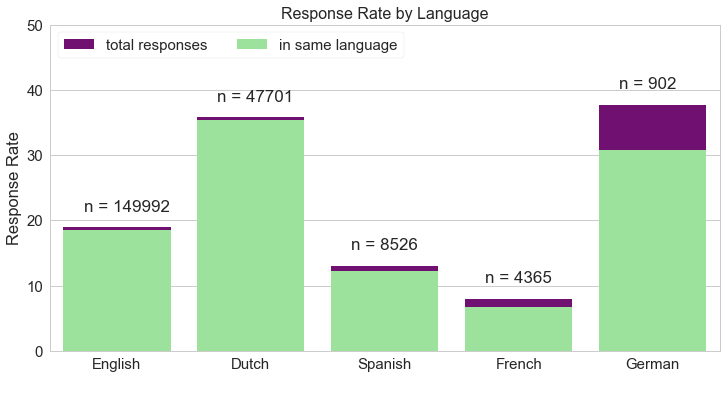

In [76]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.5)

sample_sizes = ["n = 149992", "n = 47701", "n = 8526", "n = 4365", "n = 902"]

fig, ax = plt.subplots(figsize=(12,6))
sns.set_color_codes("pastel")
sns.barplot(x='index', y='% outgoing', data=language_df, label="total responses", color="purple")
sns.set_color_codes("muted")
sns.barplot(x='index', y="% outgoing of same language", data=language_df, label="in same language", color="lightgreen")
ax.legend(ncol=2, loc="upper left", frameon=True)
ax.set(xlabel=' ', ylabel="Response Rate");
plt.ylim(0,50)
for i in range(5):
    plt.text(x = i-0.25, y = language_df["% outgoing"][i]+2.5, s = sample_sizes[i], size = 17)
ax.set_title("Response Rate by Language", fontsize=16);
plt.savefig('outgoingtweets', dpi=300)


##### 